<h1><center>Project Machine Learning :</center></h1>
<h1><center>Drinking Water Potability</center></h1>

<h3>
<hr style=" border:none; height:3px;">
<center>Ruben Partouche, Bastien Pomes</center>
<hr style=" border:none; height:3px;">
</h3>

# Introduction

Access to safe drinking water is essential to health, a basic human right, and a component of effective policy for health protection. This is important as a health and development issue at a national, regional, and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

The data are in the drinkingwaterpotability.csv file and it contains water quality metrics (10 features) for 3276 different water bodies.

# Setup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse et traitement des données

In [3]:
df = pd.read_csv("drinking_water_potability.csv")

In [4]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df2 = df.describe()
df2.round(2)

ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  \
count  2785.00   3276.00   3276.00      3276.00  2495.00       3276.00   
mean      7.08    196.37  22014.09         7.12   333.78        426.21   
std       1.59     32.88   8768.57         1.58    41.42         80.82   
min       0.00     47.43    320.94         0.35   129.00        181.48   
25%       6.09    176.85  15666.69         6.13   307.70        365.73   
50%       7.04    196.97  20927.83         7.13   333.07        421.88   
75%       8.06    216.67  27332.76         8.11   359.95        481.79   
max      14.00    323.12  61227.20        13.13   481.03        753.34   

       Organic_carbon  Trihalomethanes  Turbidity  Potability  
count         3276.00          3114.00    3276.00     3276.00  
mean            14.28            66.40       3.97        0.39  
std              3.31            16.18       0.78        0.49  
min              2.20             0.74       1.45        0.00  
25%             12.07            55.84       3.44        0.00  
50%             14.22            66.62       3.96        0.00  
75%             16.56            77.34       4.50        1.00  
max             28.30           124.00       6.74        1.00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

/home/rpartouche/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


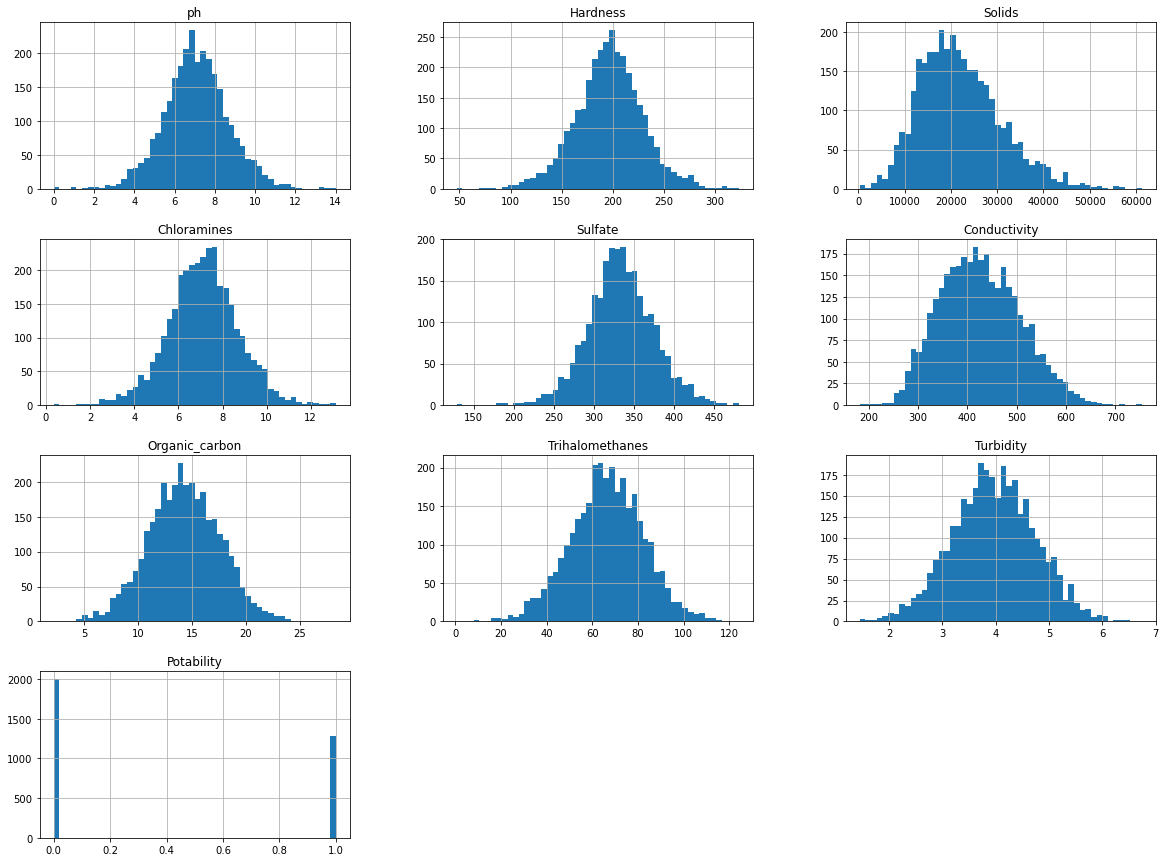

In [8]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

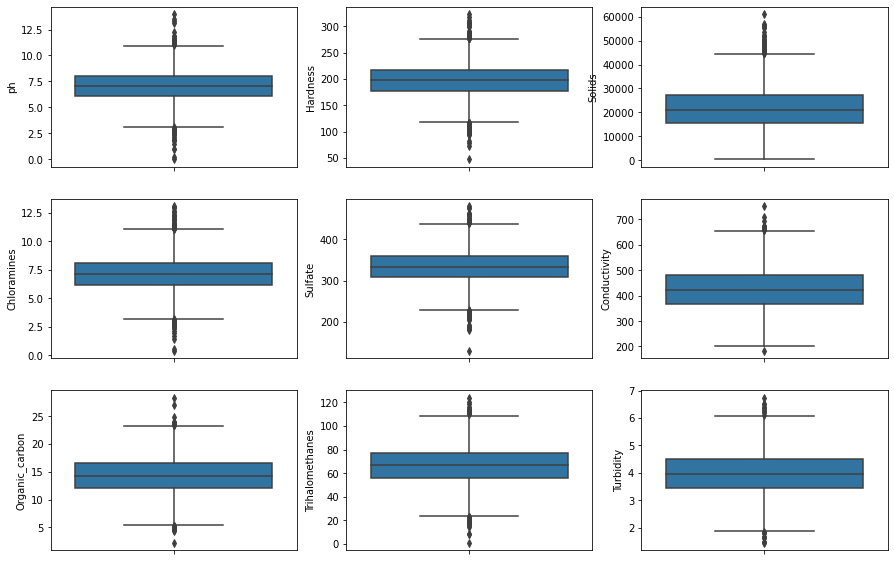

In [9]:
plt.figure(figsize=(15,10))
im=1
for x in df.columns[df.columns != 'Potability']:
    plt.subplot(3,3,im)
    sns.boxplot(data=df,y=x)
    im+=1

Text(0.5, 1.0, 'Correlation Matrix')

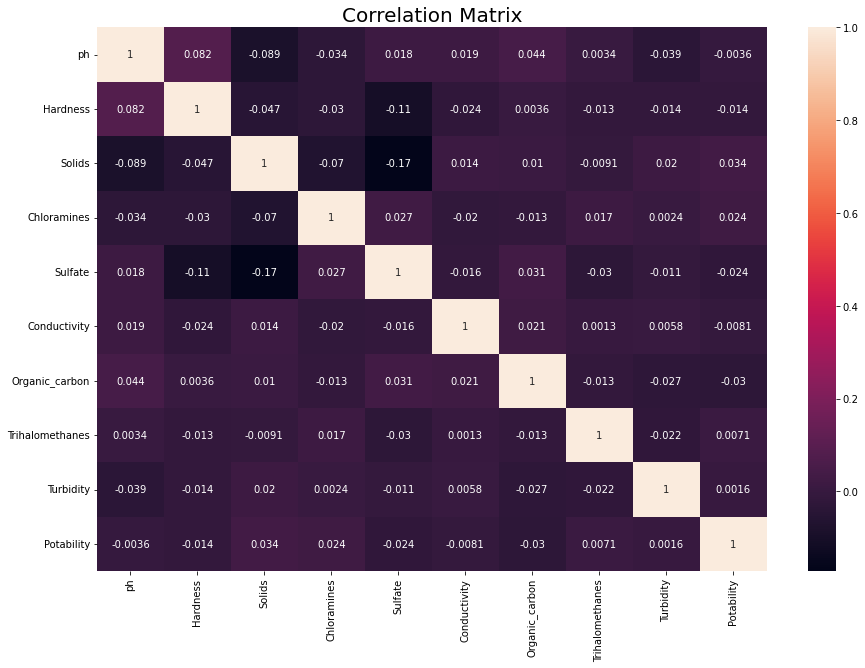

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=20)

In [11]:
# Print the dimensions of the original housing data
print("Dimensions of original data:", df.shape)
# Drop any rows where at least one element is missing
df_missing_dropped = df.dropna()
# Print the dimensions of the modified housing data
print("Dimensions of modified data:", df_missing_dropped.shape)

Dimensions of original data: (3276, 10)
Dimensions of modified data: (2011, 10)


# Analyse de différentes méthodes de ML

## Preprocess Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

from imblearn.over_sampling import BorderlineSMOTE,SVMSMOTE, ADASYN, KMeansSMOTE

possible_missing_strategy = ['drop', SimpleImputer(strategy='mean'), SimpleImputer(strategy='median'), SimpleImputer(strategy='most_frequent'),
                            IterativeImputer(sample_posterior=True), IterativeImputer(sample_posterior=False),
                            KNNImputer(n_neighbors=2),KNNImputer(n_neighbors=5),KNNImputer(n_neighbors=10)]

possible_scale_strategy = [None, Normalizer(norm='l1'), Normalizer(norm='l2'), Normalizer(norm='max'), StandardScaler(), MinMaxScaler()]

possible_augmentation_strategy = [None, BorderlineSMOTE(),SVMSMOTE(), ADASYN(), KMeansSMOTE(cluster_balance_threshold=0.43)]

def preprocess_data(missing_strategy, scale_strategy, augmentation_strategy):

    # Missing strategy
    if missing_strategy == 'drop':
        train_set, test_set = train_test_split(df_missing_dropped, test_size=0.15, random_state=42)
        X_train = train_set.drop("Potability", axis=1)
        y_train = train_set["Potability"].copy()
        X_test = test_set.drop("Potability", axis=1)
        y_test = test_set["Potability"].copy()
    else:
        train_set, test_set = train_test_split(df, test_size=0.15, random_state=42)
        X_train = train_set.drop("Potability", axis=1)
        y_train = train_set["Potability"].copy()
        X_test = test_set.drop("Potability", axis=1)
        y_test = test_set["Potability"].copy()

        imputer = missing_strategy
        imputer.fit(X_train)
        X_train = imputer.transform(X_train)
        X_test = imputer.transform(X_test)
    
    # Data augmentation strategy
    if augmentation_strategy != None:
        X_train, y_train = augmentation_strategy.fit_resample(X_train,y_train)

    # Scale strategy
    if scale_strategy != None:
        scaler = scale_strategy
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

    return X_train, y_train, X_test, y_test

## Run model

In [13]:
from sklearn.metrics import fbeta_score, accuracy_score
resultats = pd.DataFrame(columns=['model','missing_strategy','scale_strategy','accuracy_train','f1score_train','accuracy_test','f1score_test'])

def find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy, possible_augmentation_strategy):
    global resultats
    for missing_strategy in possible_missing_strategy:
        for scale_strategy in possible_scale_strategy:
            for augmentation_strategy in possible_augmentation_strategy:
                X_train, y_train, X_test, y_test = preprocess_data(missing_strategy, scale_strategy, augmentation_strategy)
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
                y_pred_train = best_model.predict(X_train)
                y_pred_test = best_model.predict(X_test)
                accuracy_train = accuracy_score(y_train, y_pred_train)
                fscore_train = fbeta_score(y_train, y_pred_train, beta=0.5)
                accuracy_test = accuracy_score(y_test, y_pred_test)
                fscore_test = fbeta_score(y_test, y_pred_test, beta=0.5)
                resultats = resultats.append({'model':best_model,'missing_strategy':missing_strategy,'augmentation_strategy':augmentation_strategy,'scale_strategy':scale_strategy,'accuracy_train':accuracy_train,'fscore_train':fscore_train,'accuracy_test':accuracy_test,'fscore_test':fscore_test},ignore_index=True)

## Test different models

In [13]:
from sklearn.model_selection import GridSearchCV

### SVC

In [ ]:
from sklearn.svm import SVC

pgrid = {"kernel": ['poly', 'rbf', 'sigmoid'],
        "C": [1,10,100,1000],
        "degree": [1,2,3,5]}

grid_search = GridSearchCV(SVC(), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy,possible_augmentation_strategy)     

### Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pgrid = {"max_depth": [1, 2, 4, 5, 6, 8, 10],
        "min_samples_split": [2, 5, 10, 15, 20]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy)
            

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

pgrid = {"max_depth": [1, 2, 4, 8],
        "min_samples_split": [2, 5, 10, 15]}

grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy)
            

### KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pgrid = {"n_neighbors": [1, 2, 4, 5, 6, 8, 10]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy)

### Bagging Tree

In [ ]:
from sklearn.ensemble import BaggingClassifier

pgrid = {"max_samples": [0.5, 1.0]}

grid_search = GridSearchCV(BaggingClassifier(n_estimators=100), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy)

### Bagging KNN

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

pgrid = {}

grid_search = GridSearchCV(BaggingClassifier(KNeighborsClassifier(), n_estimators=100), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pgrid = {"max_depth": [1, 3, 5, 10],
        "min_samples_split": [2, 5, 10, 20]}

grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy)

### Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

pgrid = {"var_smoothing": [1e-9,1e-6]}

grid_search = GridSearchCV(GaussianNB(), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy)

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

pgrid = {"learning_rate": [1e-3,1e-2,1e-1,1.0]}

grid_search = GridSearchCV(AdaBoostClassifier(n_estimators=200), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy)

### GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

pgrid = {"learning_rate": [1e-3,1e-2,1e-1,1.0]}

grid_search = GridSearchCV(GradientBoostingClassifier(n_estimators=200), param_grid=pgrid, scoring='f1')

find_best_params(grid_search,possible_missing_strategy,possible_scale_strategy)

In [14]:
resultats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   model             0 non-null      object
 1   missing_strategy  0 non-null      object
 2   scale_strategy    0 non-null      object
 3   accuracy_train    0 non-null      object
 4   f1score_train     0 non-null      object
 5   accuracy_test     0 non-null      object
 6   f1score_test      0 non-null      object
dtypes: object(7)
memory usage: 0.0+ bytes


In [15]:
resultats = resultats.sort_values(by='f1score_test',axis=0,ascending=False)

In [16]:
resultats.head()

Empty DataFrame
Columns: [model, missing_strategy, scale_strategy, accuracy_train, f1score_train, accuracy_test, f1score_test]
Index: []

In [17]:
resultats.to_csv('output15.csv')

# Selection et entrainement du meilleur modèle

On a constaté que l'on obtenait les résultats les plus intéressants pour notre use case (précision élevée) avec le BaggingClassifier de SVC a kernel gaussiens, pour le dataset avec listwise deletion, une augmentation via KMeansSMOTE, et une standardisation. Entrainons et testons cette modèle par cross validation.

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, fbeta_score,precision_score,recall_score

model = BaggingClassifier(base_estimator=SVC(probability=True),n_estimators=50)

missing_strat = possible_missing_strategy[0] 

scale_strat = possible_scale_strategy[4]

augmentation_strat = possible_augmentation_strategy[4] 

X_train, y_train, X_test, y_test = preprocess_data(missing_strat,scale_strat,augmentation_strat)

scorer = make_scorer(fbeta_score,beta=0.5)
scorer2 = make_scorer(precision_score)
scorer3 = make_scorer(recall_score)
cv_results = pd.DataFrame(cross_validate(model,X_train,y_train,cv=5,return_train_score=True,return_estimator=True,scoring={'f0.5':scorer,'precision':scorer2,'recall':scorer3}))
cv_results

/home/rpartouche/miniconda3/lib/python3.9/site-packages/threadpoolctl.py:546: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


fit_time  score_time                                          estimator  \
0   9.247529    0.702104  (SVC(probability=True, random_state=1301071664...   
1   8.167556    0.722724  (SVC(probability=True, random_state=1823420527...   
2   8.418069    0.697945  (SVC(probability=True, random_state=545128436)...   
3   8.767074    0.794210  (SVC(probability=True, random_state=279905050)...   
4  10.150525    1.004103  (SVC(probability=True, random_state=782178807)...   

   test_f0.5  train_f0.5  test_precision  train_precision  test_recall  \
0   0.625000    0.830100        0.688889         0.858166     0.455882   
1   0.592857    0.845506        0.669355         0.877551     0.406863   
2   0.631720    0.845630        0.696296         0.880355     0.460784   
3   0.761278    0.807546        0.753488         0.829847     0.794118   
4   0.830479    0.800697        0.804979         0.820055     0.950980   

   train_recall  
0      0.734069  
1      0.737745  
2      0.730392  
3      0.729167  
4      0.731618

Pour 10 estimateurs, nous avons encore des modèles peu performants parfois, très performants d'autres : nous allons effectuer une grid search pour nous assurer d'obtenir des performances satifaisantes dans tous les cas.

In [22]:
from sklearn.model_selection import GridSearchCV

scorer = make_scorer(fbeta_score,beta=0.5)
params = {'n_estimators':[i*10 for i in range(1,6)],'bootstrap_features':[True,False],'max_features':[i/10 for i in range(5,11)]}
search = GridSearchCV(model,params,scoring=scorer,n_jobs=-1,cv=5)
search.fit(X_train,y_train)
search.best_params_

{'bootstrap_features': False, 'max_features': 0.9, 'n_estimators': 30}

In [25]:
pred = search.best_estimator_.predict(X_test)
pred_train = search.best_estimator_.predict(X_train)
pd.DataFrame({'fbeta_test':[fbeta_score(y_test,pred,0.5)],'fbeta_train':[fbeta_score(y_train,pred_train,0.5)],
'precision_test':[precision_score(y_test,pred)],'precision_train':[precision_score(y_train,pred_train)],
'recall_test':[recall_score(y_test,pred)],'recall_train':[recall_score(y_train,pred_train)]})

/home/rpartouche/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/rpartouche/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


fbeta_test  fbeta_train  precision_test  precision_train  recall_test  \
0    0.623762     0.815556         0.65625         0.843678     0.520661   

   recall_train  
0      0.719608

Les résultats obtenus sont assez satifaisants au niveau du train, les résultats du test étant un peu décevants. Il s'agit d'un problème d'overfitting lié a l'utilisation de la grid-search finalement, un des modèles précédents obtenus lors de la cross-validation pouvant être parfaitement satifsaisant.